## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata_df, study_results_df, how="left", on="Mouse ID")
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
                      

regimen_avg = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


regimen_df = pd.DataFrame({"Mean": regimen_avg, "Median": regimen_median, 
                           "Variance": regimen_var, "Std Dev": regimen_std, "SEM": regimen_sem})
regimen_df




,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

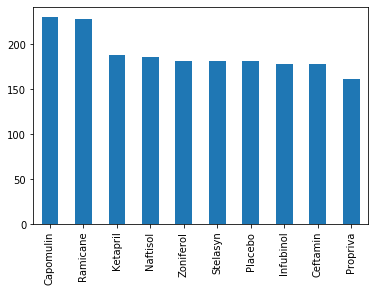

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#regimen_ct = combined_data_df[["Drug Regimen"]].count()
#regimen_ct

regimen_treat = combined_data_df[["Drug Regimen"]]

data_pts_regimen = regimen_treat["Drug Regimen"].value_counts()
#data_pts_regimen

pand_bplot = data_pts_regimen.plot.bar(x="Drug Treatment", y="Count",rot=90)
pand_bplot

(0, 255)

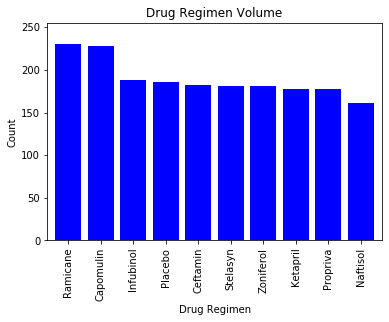

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = regimen_treat["Drug Regimen"].unique()

drug_regimen = regimen_treat["Drug Regimen"].value_counts()

plt.bar(x_axis, drug_regimen, color="b", align="center")
plt.xticks(rotation=90)
plt.title("Drug Regimen Volume")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.xlim(-0.65, len(x_axis)-0.35)
plt.ylim(0, max(drug_regimen)+25)




## Pie plots

In [5]:
#Determine distinct values for Male and Females to be used for pandas pie chart
male_female = combined_data_df[["Sex"]]
male_female_ct = male_female["Sex"].value_counts()
male_female_ct

Male      958
Female    935
Name: Sex, dtype: int64

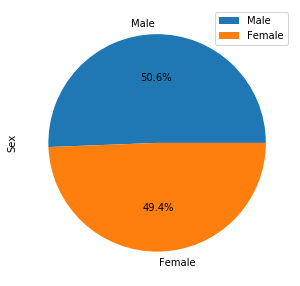

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mvf_df = pd.DataFrame({"Sex": [958, 935]}, index=["Male", "Female"] )

plot = mvf_df.plot(kind="pie", y="Sex", autopct='%1.1f%%', figsize=(5, 5))



([<matplotlib.patches.Wedge at 0x1af3e41e6a0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

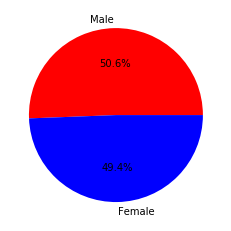

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = combined_data_df[["Sex"]]

labels = mice_sex["Sex"].unique()
sizes = mice_sex["Sex"].value_counts()

colors = ["red", "blue"]
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.


#Create Dataframe containing information related only to Campomulin, Ramicane, Infubinol, and Ceftamin
promising_treatment_df = combined_data_df.loc[combined_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

#Calculate final tumor volume for each mouse ID for Campomulin, Ramicane, Infubinol, and Ceftamin
tum_vol_promising_treatment = promising_treatment_df.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last()

#Create Dataframe with Final Tumor Volume by MouseID 
final_tum_vol_mid_df = pd.DataFrame({"Final Tumor Volume (mm3)": tum_vol_promising_treatment})
final_tum_vol_mid_df





,,Final Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


In [9]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

final_tumor_volume = final_tum_vol_mid_df["Final Tumor Volume (mm3)"]
quartiles = final_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin is: {lowerq}")
print(f"The upper quartile of final tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin is: {upperq}")
print(f"The interquartile of final tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin is: {iqr}")
print(f"The the median of final tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} would be outliers.")
print(f"Values above {upper_bound} would be outliers.")

#Per the data, there are no outliers


The lower quartile of final tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin is: 37.187743802499995
The upper quartile of final tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin is: 59.930261755000004
The interquartile of final tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin is: 22.74251795250001
The the median of final tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin is: 45.0 
Values below 3.0739668737499812 would be outliers.
Values above 94.04403868375002 would be outliers.


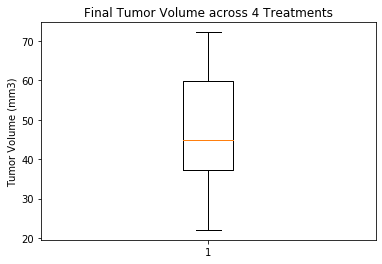

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume across 4 Treatments")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(final_tumor_volume)
plt.show()

## Line and scatter plots

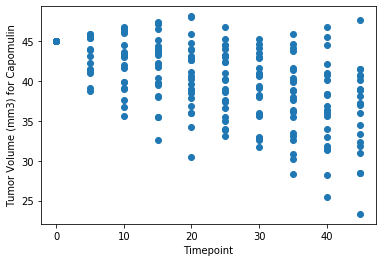

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Determine unique values for Timepoint that will be used for x-axis

promising_treatment_cap_df = combined_data_df.loc[combined_data_df["Drug Regimen"].isin(["Capomulin"])]
time_point = promising_treatment_cap_df[["Timepoint"]]



#Set values for x and y values and create Scatterplot
x_values = time_point
y_values = promising_treatment_cap_df[["Tumor Volume (mm3)"]]
plt.scatter(x_values,y_values)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3) for Capomulin")
plt.show()



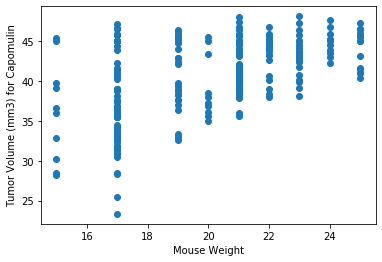

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight = promising_treatment_cap_df[["Weight (g)"]]
#mouse_weight

tumor_vol_cap = promising_treatment_cap_df[["Tumor Volume (mm3)"]]
#tumor_vol_cap

x_values = mouse_weight
y_values = tumor_vol_cap
plt.scatter(x_values,y_values)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3) for Capomulin")
plt.show()


In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen